In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [ ]:
img_height = 128 # Example image height
img_width = 128 # Example image width
batch_size = 32
validation_split = 0.2
# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255) # Normalize pixel values to [0, 1]
# Create training dataset with normalization

In [ ]:
train_dir = '/content/drive/MyDrive/AI and ML/Worksheet6/FruitinAmazon/train'

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=True,
validation_split=validation_split,
subset='training',
seed=123
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [ ]:
print(train_ds)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:

# Create validation dataset with normalization
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
train_dir,
labels='inferred',
label_mode='int',
image_size=(img_height, img_width),
interpolation='nearest',
batch_size=batch_size,
shuffle=False,
validation_split=validation_split,
subset='validation',
seed=123
)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [ ]:
rescale = tf.keras.layers.Rescaling(1./255)

In [ ]:
img_height = 128 # Reshapes to image height
img_width = 128 # Reshapes image width
batch_size = 32
validation_split = 0.2

In [ ]:
model = keras.Sequential([
layers.Conv2D(32, (3, 3), activation="relu", input_shape=(128,128,3)),
layers.MaxPooling2D((2, 2)),
layers.Conv2D(64, (3, 3), activation="relu"),
layers.MaxPooling2D((2, 2)),
layers.Flatten(),
layers.Dense(128, activation="relu"),
layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 57600)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,372,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,393,610 (28.20 MB)

 Trainable params: 7,393,610 (28.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer="adam",

loss="sparse_categorical_crossentropy", # labels are in integer
metrics=["accuracy"])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True),
    EarlyStopping(patience=3, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=callbacks
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1036 - loss: 2.7771

3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 4s/step - accuracy: 0.1124 - loss: 2.8394 - val_accuracy: 0.0000e+00 - val_loss: 2.3774
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 513ms/step - accuracy: 0.3096 - loss: 2.1294

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 818ms/step - accuracy: 0.3121 - loss: 2.1028 - val_accuracy: 0.6667 - val_loss: 1.2265
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 519ms/step - accuracy: 0.4138 - loss: 1.4809

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 773ms/step - accuracy: 0.4214 - loss: 1.4663 - val_accuracy: 0.7778 - val_loss: 1.0002
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 634ms/step - accuracy: 0.6124 - loss: 1.0340 - val_accuracy: 0.5556 - val_loss: 1.0935
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 790ms/step - accuracy: 0.9502 - loss: 0.5683

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.9488 - loss: 0.5684 - val_accuracy: 0.8333 - val_loss: 0.4325
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 625ms/step - accuracy: 0.7708 - loss: 0.5309 - val_accuracy: 0.8333 - val_loss: 0.4844
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - accuracy: 0.9644 - loss: 0.2129 - val_accuracy: 0.6667 - val_loss: 0.9164
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 650ms/step - accuracy: 0.9410 - loss: 0.2199 - val_accuracy: 0.7778 - val_loss: 0.4940


In [ ]:
test_loss, test_acc = model.evaluate(val_ds)
print(f"Validation Accuracy: {test_acc:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.8333 - loss: 0.4325
Validation Accuracy: 0.83


In [ ]:
test_dir = "/content/drive/MyDrive/AI and ML/Worksheet6/FruitinAmazon/test"  # Replace with your test data path

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',  # Same as training
    image_size=(img_height, img_width),  # Must match training (e.g., 128x128)
    batch_size=batch_size,  # Same as training
    shuffle=False,  # No need to shuffle for evaluation
    interpolation='nearest',
    seed=123  # For reproducibility
)

# Apply the same rescaling as training
test_ds = test_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.6748 - loss: 0.8748
Test Accuracy: 0.6778
Test Loss: 0.8397


In [ ]:
# Get predicted probabilities for each class
y_probs = model.predict(test_ds)  # Shape: (num_samples, 10)

# Convert to class labels (argmax)
y_pred = tf.argmax(y_probs, axis=1).numpy()  # Shape: (num_samples,)

# True labels (if needed)
y_true = tf.concat([y for x, y in test_ds], axis=0).numpy()

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 433ms/step


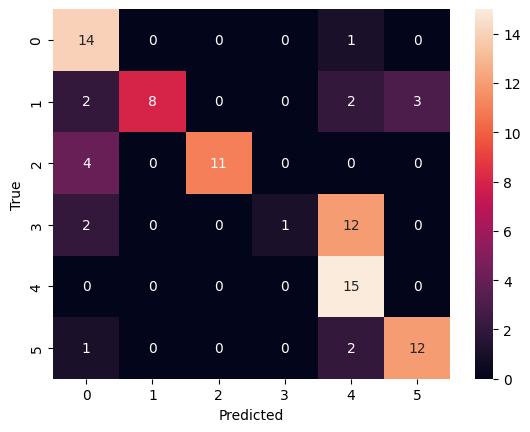

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74        15
           1       1.00      0.53      0.70        15
           2       1.00      0.73      0.85        15
           3       1.00      0.07      0.12        15
           4       0.47      1.00      0.64        15
           5       0.80      0.80      0.80        15

    accuracy                           0.68        90
   macro avg       0.81      0.68      0.64        90
weighted avg       0.81      0.68      0.64        90

